In [1]:
import numpy as np
#library that contains mathematical tools

import matplotlib.pyplot as plt
#library that help us plot nice charts

import pandas as pd
#best library to import and manage datasets 


In [3]:
#importing the dataset
dataset = pd.read_csv('TravelInsurancePrediction.csv')

X = dataset.iloc[: , 1:9].values 
# our input(features) equals all rows and columns from 1 to 9

y = dataset.iloc[: , 9].values
# our output equals all rows and the last column only


In [4]:
from sklearn.preprocessing import LabelEncoder
#encoding categorial data -> class from sklearn
 # we fit to the second column
labelEncoder_X1 = LabelEncoder()
X[:, 1] = labelEncoder_X1.fit_transform(X[:, 1])

labelEncoder_X2 = LabelEncoder()
X[:, 2] = labelEncoder_X2.fit_transform(X[:, 2])
labelEncoder_X3 = LabelEncoder()
X[:, 6] = labelEncoder_X3.fit_transform(X[:, 6])
labelEncoder_X4 = LabelEncoder() 
X[:, 7] = labelEncoder_X4.fit_transform(X[:, 7])


In [5]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state= 0)

In [6]:
#features scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() #object from the class to scale x matrix
X = sc_X.fit_transform(X)
X_train = sc_X.fit_transform(X_train)
#fit the object and then transform the training set
X_test = sc_X.transform(X_test)


0.8115577889447236


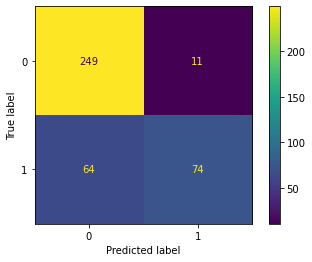

In [7]:
#classifier 
from sklearn.svm import SVC
classifier = SVC(kernel=('poly'), random_state = 0, probability=(1))
classifier.fit(X_train, y_train)
#prediction
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
s = accuracy_score(y_test, y_pred)
print(s)
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()


0.7469620958751395


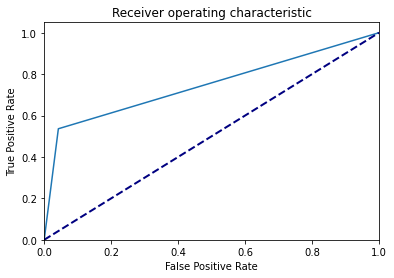

In [8]:
#ROC curve 
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
print(roc_auc_score(y_test, y_pred))
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()



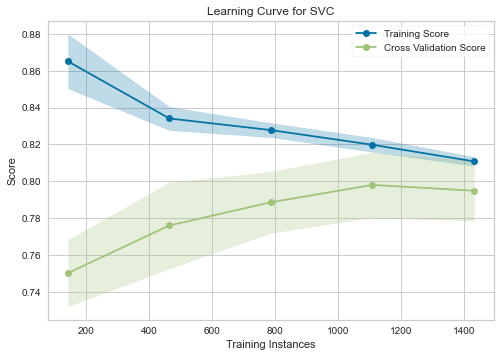

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [10]:
#learning curve
from yellowbrick.model_selection import learning_curve
print(learning_curve(classifier, X_train, y_train, cv=10, scoring='accuracy')) 
